In [30]:
#import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
#import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import os
import re
import sklearn as skl
import pandas as pd

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 10000

In [31]:
def Dice(pred,true,labels=[0,1,2,3]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        ret[i] = 2*np.logical_and(p,t).sum()/(p.sum()+t.sum())
    return ret

In [44]:
seg = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_true.nrrd')

inf = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_inf_85.nrrd')

seg_subsample = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_true_subsample.nrrd')

inf_subsample = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_inf_85_subsample.nrrd')

seg_upsample = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_true_upsample.nrrd')

inf_upsample = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_inf_85_upsample.nrrd')

seg_subsample_1 = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_true_subsample_1.nrrd')
seg_upsample_1 = sitk.ReadImage('/proj/NIRAL/users/siyangj/test/1_true_upsample_1.nrrd')



In [46]:
seg_arr = sitk.GetArrayFromImage(seg)
inf_arr = sitk.GetArrayFromImage(inf)
seg_subsample_arr = sitk.GetArrayFromImage(seg_subsample)
inf_subsample_arr = sitk.GetArrayFromImage(inf_subsample)
seg_upsample_arr = sitk.GetArrayFromImage(seg_upsample)
inf_upsample_arr = sitk.GetArrayFromImage(inf_upsample)
seg_subsample_arr = sitk.GetArrayFromImage(seg_subsample_1)
seg_upsample_1_arr = sitk.GetArrayFromImage(seg_upsample_1)


In [41]:
seg_upsample_arr.shape

(96, 112, 96)

In [35]:
np.unique(inf_subsample_arr)

array([0, 1, 2, 3], dtype=int32)

In [36]:
Dice(seg_arr,seg_upsample_arr)

array([0.97819645, 0.77924594, 0.80821509, 0.76227652])

In [37]:
Dice(seg_arr,inf_upsample_arr)

array([0.97885938, 0.73368597, 0.75462291, 0.70596322])

In [39]:
Dice(seg_subsample_arr,inf_subsample_arr)

array([0.99641183, 0.84627127, 0.86377666, 0.84715249])

In [40]:
Dice(seg_upsample_arr,inf_upsample_arr)

array([0.99641183, 0.84627127, 0.86377666, 0.84715249])

In [48]:
Dice(seg_arr,seg_upsample_1_arr)

array([0.99066857, 0.88643203, 0.87744897, 0.87979247])

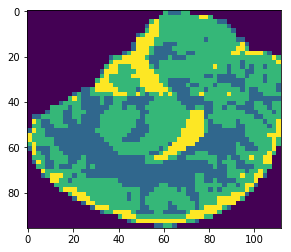

In [49]:
plt.imshow(seg_upsample_arr[:,:,60])

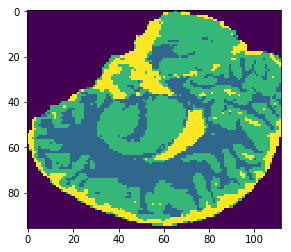

In [51]:
plt.imshow(seg_upsample_1_arr[:,:,60])

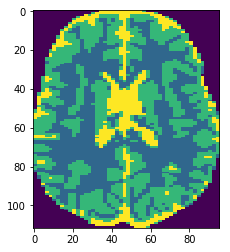

In [50]:
plt.imshow(seg_upsample_1_arr[60,:,:])